## Siamese Network 

Credit: PyImage Search's by Adrain Rosebock  https://www.pyimagesearch.com/2020/11/23/building-image-pairs-for-siamese-networks-with-python/ 

Siamese networks are a special type of network with contain two or more identical subnetworks. These subnetworks have the same architecture parameters and weights and parameter updates are mirrored across both networks. 

They are very relevant in verification, identification and recognition tasks, especially in facial recognition and signature verification.

In [2]:
pip install imutils

  Using cached imutils-0.5.3.tar.gz (17 kB)
  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=c7ed10d92c1c00f26e42455d276a61bf65ee3593b41cfcc6d493a8d118ae2057
  Stored in directory: /Users/mofeadeyemi/Library/Caches/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import the necessary libraries

from tensorflow.keras.datasets import mnist
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Part 1: Building Image Pairs for Siamese Networks with Python

First we build an image pair generator. This would accept a set of input images and labels and then generate positive and negative pairs. The MNIST digit dataset would be the sample dataset.

In [2]:
# Define generator function

def generate_pairs(images, labels):
    
    # Initialize empty lists to hold image 
    pair_images = []
    pair_labels = []
    
    # Build a list containing lists of the indices of unique labels
    num_classes = len(np.unique(labels))
    indexes = [np.where(labels == i)[0] for i in range(0, num_classes)]
    
    # Generate pairs and corresponding labels
    for imgA_ind in range(len(images)):
        
        curr_img = images[imgA_ind]
        label = labels[imgA_ind]
        
        # Get a positive image i.e with the same label 
        imgB_ind = np.random.choice(indexes[label])
        pos_img = images[imgB_ind]
        
        pair_images.append([curr_img, pos_img])
        pair_labels.append(1)
        
        # Get a negative image i.e with different label
        # First we get the indices of labels not the same as the label above
        
        neg_indexes = np.where(labels != label)[0]
        neg_img = images[np.random.choice(neg_indexes)]
        
        pair_images.append([curr_img, neg_img])
        pair_labels.append(0)
        
    
    return (np.array(pair_images), np.array(pair_labels))
        

In [3]:
# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Build pairs for train and test data
(train_pairs, train_labels) = generate_pairs(train_X, train_y)
(test_pairs, test_labels) = generate_pairs(test_X, test_y)


11493376/11490434 [==============================] - 7s 1us/step


In [5]:
# Construct a Montage to visualize image pairs

# Initialize list to be used for montages
images = []

for i in np.random.choice(np.arange(0, len(train_pairs)), size=(49,)):
    
    image_A = train_pairs[i][0]
    image_B = train_pairs[i][1]
    label = train_labels[i]
    
    output = np.zeros((36, 60), dtype='uint8')
    pair = np.hstack([image_A, image_B])
    
    output[4:32, 0:56] = pair
    
    text = 'neg' if label==0 else 'pos'
    color = (225, 0, 0) if label==0 else (0, 225, 0)
    
    visual = cv2.merge([output] * 3)
    visual = cv2.resize(visual, (96, 51), interpolation=cv2.INTER_LINEAR)
    cv2.putText(visual, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)
    
    images.append(visual)

In [7]:
# Build the montage

montage = build_montages(images, (96, 51), (7, 7))[0]

# Show the output image pairs
cv2.imshow('Siamese Image Pairs', montage)
cv2.waitKey(0)

48

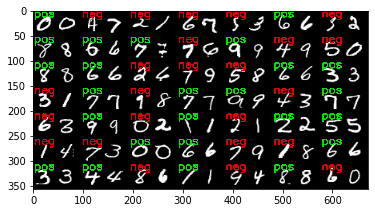

In [10]:
plt.imshow(montage)